<a href="https://colab.research.google.com/github/EuchariaOgonna/Cardiovascular-Disease-CVD-Risk-Analysis/blob/main/Cardiovascular_Disease_(CVD)_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the important libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Reading and Understanding the Dataset for Analysis**

In [ ]:
df = pd.read_csv('/content/CVD_dataset.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(70000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


**What I Found After Reading and Understanding The Dataset**

*   There are 70,000 rows (records) and 13 columns.
*   There are no missing values which makes it good for analysis.
*   All columns are numeric (int64 or float64), which is expected for structured medical data.
*   Weight is stored as float64 due to decimal values.
*   Other variables like age, gender, cholesterol, etc., are encoded as integers, but we’ll see soon if those are categorical or not.

---


---


*   For the Age, the mean: ~19468 which is in days, not years. 19468 days ≈ 53.3 years → consistent with adult patients. So I need to convert it to years.

---
---
*   Height range: 55 cm to 250 cm. 55 cm is too short for adults (suspicious—possibly an error).

*   Weight range: 10 kg to 200 kg and 10 kg is likely invalid for an adult.

So I am filtering out unrealistic or invalid data entries from the original dataframe df, and creating a new dataframe df_cleaned that only keeps reasonable data.

In [ ]:
df[(df['height'] < 100) | (df['weight'] < 30)]
# Checking for outliers or data entry errors in this dataset.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,309,21800,2,76,55.0,120,80,1,1,0,0,1,0
7598,10843,14661,2,70,72.0,120,8,1,1,0,0,1,0
8171,11662,17646,2,97,170.0,160,100,1,1,1,0,1,1
12770,18218,19594,1,75,168.0,120,80,1,1,1,0,1,1
13265,18928,22456,2,71,68.0,120,80,3,1,0,0,1,0
14323,20459,22005,1,67,57.0,120,90,1,1,0,0,1,1
15167,21686,15812,1,70,68.0,120,80,1,1,0,0,0,0
16699,23859,19680,2,74,98.0,140,90,1,1,0,0,1,1
17277,24690,17530,1,98,45.0,12,80,1,1,0,0,1,0
22542,32207,14538,1,68,65.0,100,60,1,1,0,0,0,0


In [ ]:
# Convert age from days to years and overwrite the original column
df['age'] = (df['age'] / 365).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
#Filter out abnormal blood pressure values
# Keep only records where:
# -------------------------
# height is between 100 and 250
# weight is between 30 and 250
# systolic (ap_hi) is between 90 and 200 because a normal systolic BP is ~90–180; values outside this may be errors.
# diastolic (ap_lo) is between 60 and 140 because a normal diastolic BP is ~60–120; very high/low values are suspicious.
df_cleaned = df[
    (df['height'] >= 100) & (df['height'] <= 250) &
    (df['weight'] >= 30) & (df['weight'] <= 200) &
    (df['ap_hi'] >= 90) & (df['ap_hi'] <= 200) &
    (df['ap_lo'] >= 60) & (df['ap_lo'] <= 140)
].copy ()

In [ ]:
df_cleaned.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df_cleaned['gender'] = df_cleaned['gender'].map({1: 'female', 2: 'male'})
df_cleaned.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,male,168,62.0,110,80,1,1,0,0,1,0
1,1,55,female,156,85.0,140,90,3,1,0,0,1,1
2,2,51,female,165,64.0,130,70,3,1,0,0,0,1
3,3,48,male,169,82.0,150,100,1,1,0,0,1,1
4,4,47,female,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.to_csv("CVD_dataset_cleaned.csv", index=False)

**📊 Exploratory Data Analysis (EDA)**

In [ ]:
eda_summary = df_cleaned.groupby('cardio')[['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']].mean().round(1)
print("Mean Health Metrics by CVD Status:\n", eda_summary, "\n")

Mean Health Metrics by CVD Status:
          age  height  weight  ap_hi  ap_lo  cholesterol  gluc
cardio                                                       
0       51.2   164.5    71.6  119.7   78.2          1.2   1.2
1       54.5   164.3    76.7  133.8   84.6          1.5   1.3 



In [ ]:
cvd_by_gender = df_cleaned.groupby(['gender', 'cardio']).size().unstack().fillna(0)
print("CVD Cases by Gender:\n", cvd_by_gender, "\n")

CVD Cases by Gender:
 cardio      0      1
gender              
female  22611  21950
male    11942  11931 



In [ ]:
cvd_by_cholesterol = df_cleaned.groupby(['cholesterol', 'cardio']).size().unstack().fillna(0)
print("CVD Cases by Cholesterol Level:\n", cvd_by_cholesterol, "\n")

CVD Cases by Cholesterol Level:
 cardio           0      1
cholesterol              
1            28959  22377
2             3731   5519
3             1863   5985 



In [ ]:
cvd_by_lifestyle = df_cleaned.groupby('cardio')[['smoke', 'alco', 'active']].mean().round(2)
print("Lifestyle Averages by CVD Status:\n", cvd_by_lifestyle, "\n")

Lifestyle Averages by CVD Status:
         smoke  alco  active
cardio                     
0        0.09  0.06    0.82
1        0.08  0.05    0.79 



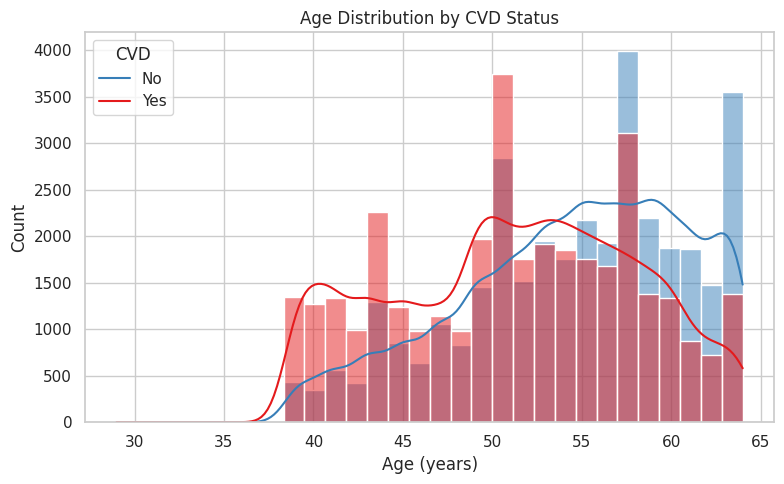

In [ ]:
sns.set(style="whitegrid")
# Plot 1: Age Distribution by CVD Status
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='cardio', bins=30, kde=True, palette='Set1')
plt.title('Age Distribution by CVD Status')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.legend(title='CVD', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

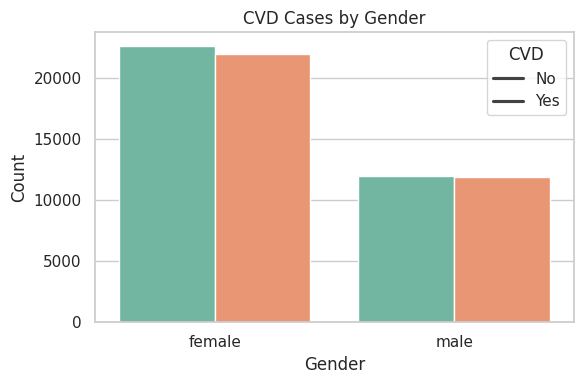

In [ ]:
# CVD Cases by Gender

plt.figure(figsize=(6, 4))
gender_counts = df_cleaned.groupby(['gender', 'cardio']).size().reset_index(name='count')
sns.barplot(data=gender_counts, x='gender', y='count', hue='cardio', palette='Set2')
plt.title('CVD Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='CVD', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

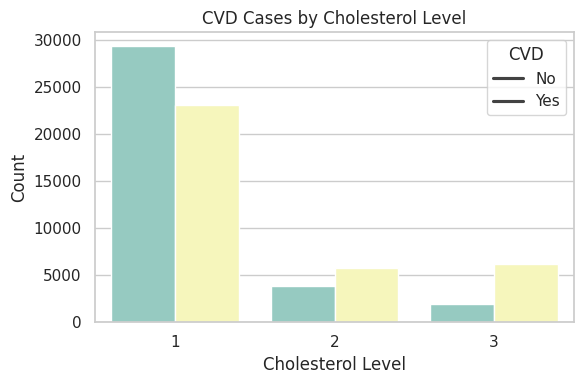

In [ ]:
#Cholesterol vs CVD
plt.figure(figsize=(6, 4))
chol_counts = df.groupby(['cholesterol', 'cardio']).size().reset_index(name='count')
sns.barplot(data=chol_counts, x='cholesterol', y='count', hue='cardio', palette='Set3')
plt.title('CVD Cases by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')
plt.legend(title='CVD', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


<ipython-input-37-339d4f34cc90>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=lifestyle, x='Lifestyle', y='Value', hue='cardio', estimator='mean', ci=None, palette='Set1')


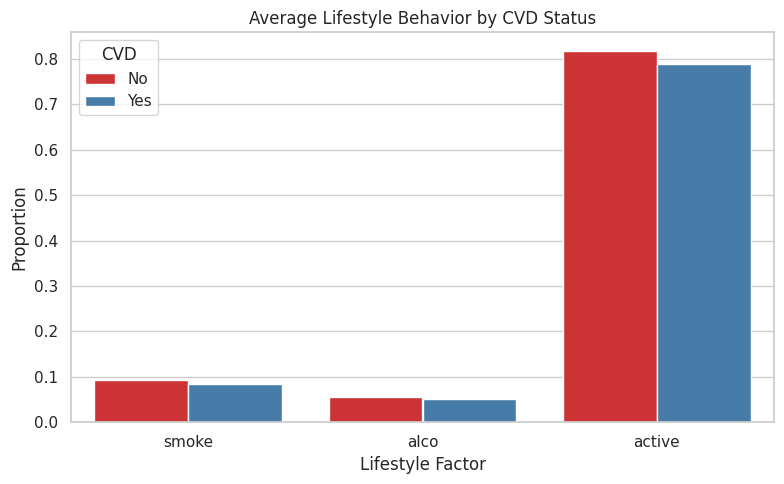

In [ ]:
# Lifestyle comparison
plt.figure(figsize=(8, 5))
lifestyle = df[['cardio', 'smoke', 'alco', 'active']].melt(id_vars='cardio', var_name='Lifestyle', value_name='Value')
sns.barplot(data=lifestyle, x='Lifestyle', y='Value', hue='cardio', estimator='mean', ci=None, palette='Set1')
plt.title('Average Lifestyle Behavior by CVD Status')
plt.ylabel('Proportion')
plt.xlabel('Lifestyle Factor')
plt.legend(title='CVD', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [ ]:
# Features and Target
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
            'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X = df[features]
y = df['cardio']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7227142857142858
Confusion Matrix:
 [[5354 1634]
 [2248 4764]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

